In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
! pip install visualkeras

     |████████████████████████████████| 795 kB 13.6 MB/s 


### 1. Importing Necessary Libraries - Import Thư Viện

In [ ]:
import os
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import visualkeras
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import *
from keras.layers import *
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 2. Load Dữ Liệu
##Link Dataset GTSRB: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [ ]:
df_path = '/content/drive/MyDrive/Colab Notebooks/Public Dataset/GTSRB dataset'
train_path = '/content/drive/MyDrive/Colab Notebooks/Public Dataset/GTSRB dataset/Train'
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Public Dataset/GTSRB dataset/Train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Public Dataset/GTSRB dataset/Test.csv')
df_meta = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Public Dataset/GTSRB dataset/Meta.csv')

Load labels

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

Load data train

In [ ]:
def load_data(data_dir):
    images = list()
    labels = list()

    for lable in range(43):
        categories = os.path.join(data_dir, str(lable))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(32, 32))
            image = img_to_array(img)
            images.append(image)
            labels.append(lable)
    
    return images, labels

In [ ]:
images, labels = load_data(train_path)

Create data valid

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(np.array(images), labels, test_size=0.2)

Load data test

In [ ]:
Y_test = df_test["ClassId"].values
test_images = df_test["Path"].values

output = list()
for img in test_images:
    image = load_img(os.path.join(df_path, img), target_size=(32, 32))
    output.append(np.array(image))

X_test=np.array(output)

In [ ]:
print("Number of training examples =", X_train.shape)
print("Number of validing examples =", X_val.shape)
print("Number of testing examples =", X_test.shape)

Number of training examples = (31367, 32, 32, 3)
Number of validing examples = (7842, 32, 32, 3)
Number of testing examples = (12630, 32, 32, 3)


### 3. Mô tả dữ liệu

### 4. Trực quan hóa dữ liệu

In [ ]:
N_CLASSES = np.unique(Y_train).size

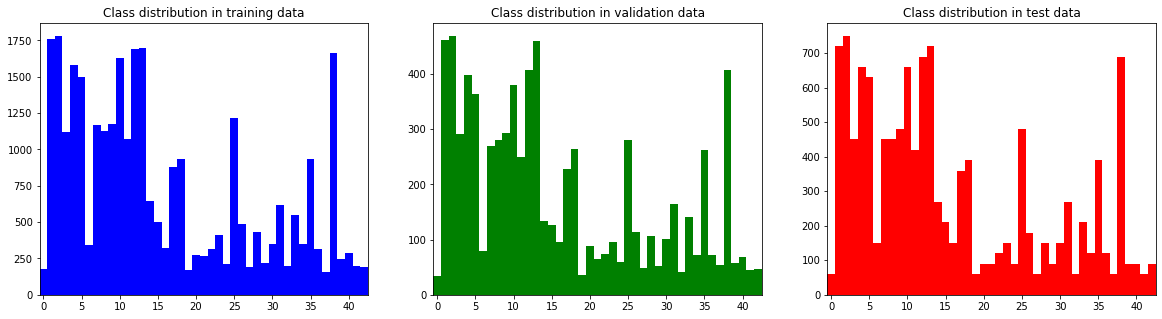

In [ ]:
def plot_dist(y_data, title=None, ax=None, **kwargs):
    '''
    Plot the traffic sign class distribution
    '''
    if not ax :
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ax.hist(y_data, np.arange(-0.5, N_CLASSES+1.5), stacked=True, **kwargs)
    ax.set_xlim(-0.5,N_CLASSES-0.5)
    if 'label' in kwargs : ax.legend()
    if title : ax.set_title(title)
        
fig,ax = plt.subplots(1,3, figsize=(20,5))
plot_dist(Y_train, title='Class distribution in training data', ax=ax[0], color='blue')
plot_dist(Y_val, title='Class distribution in validation data', ax=ax[1], color='green')
plot_dist(Y_test, title='Class distribution in test data', ax=ax[2], color='red')

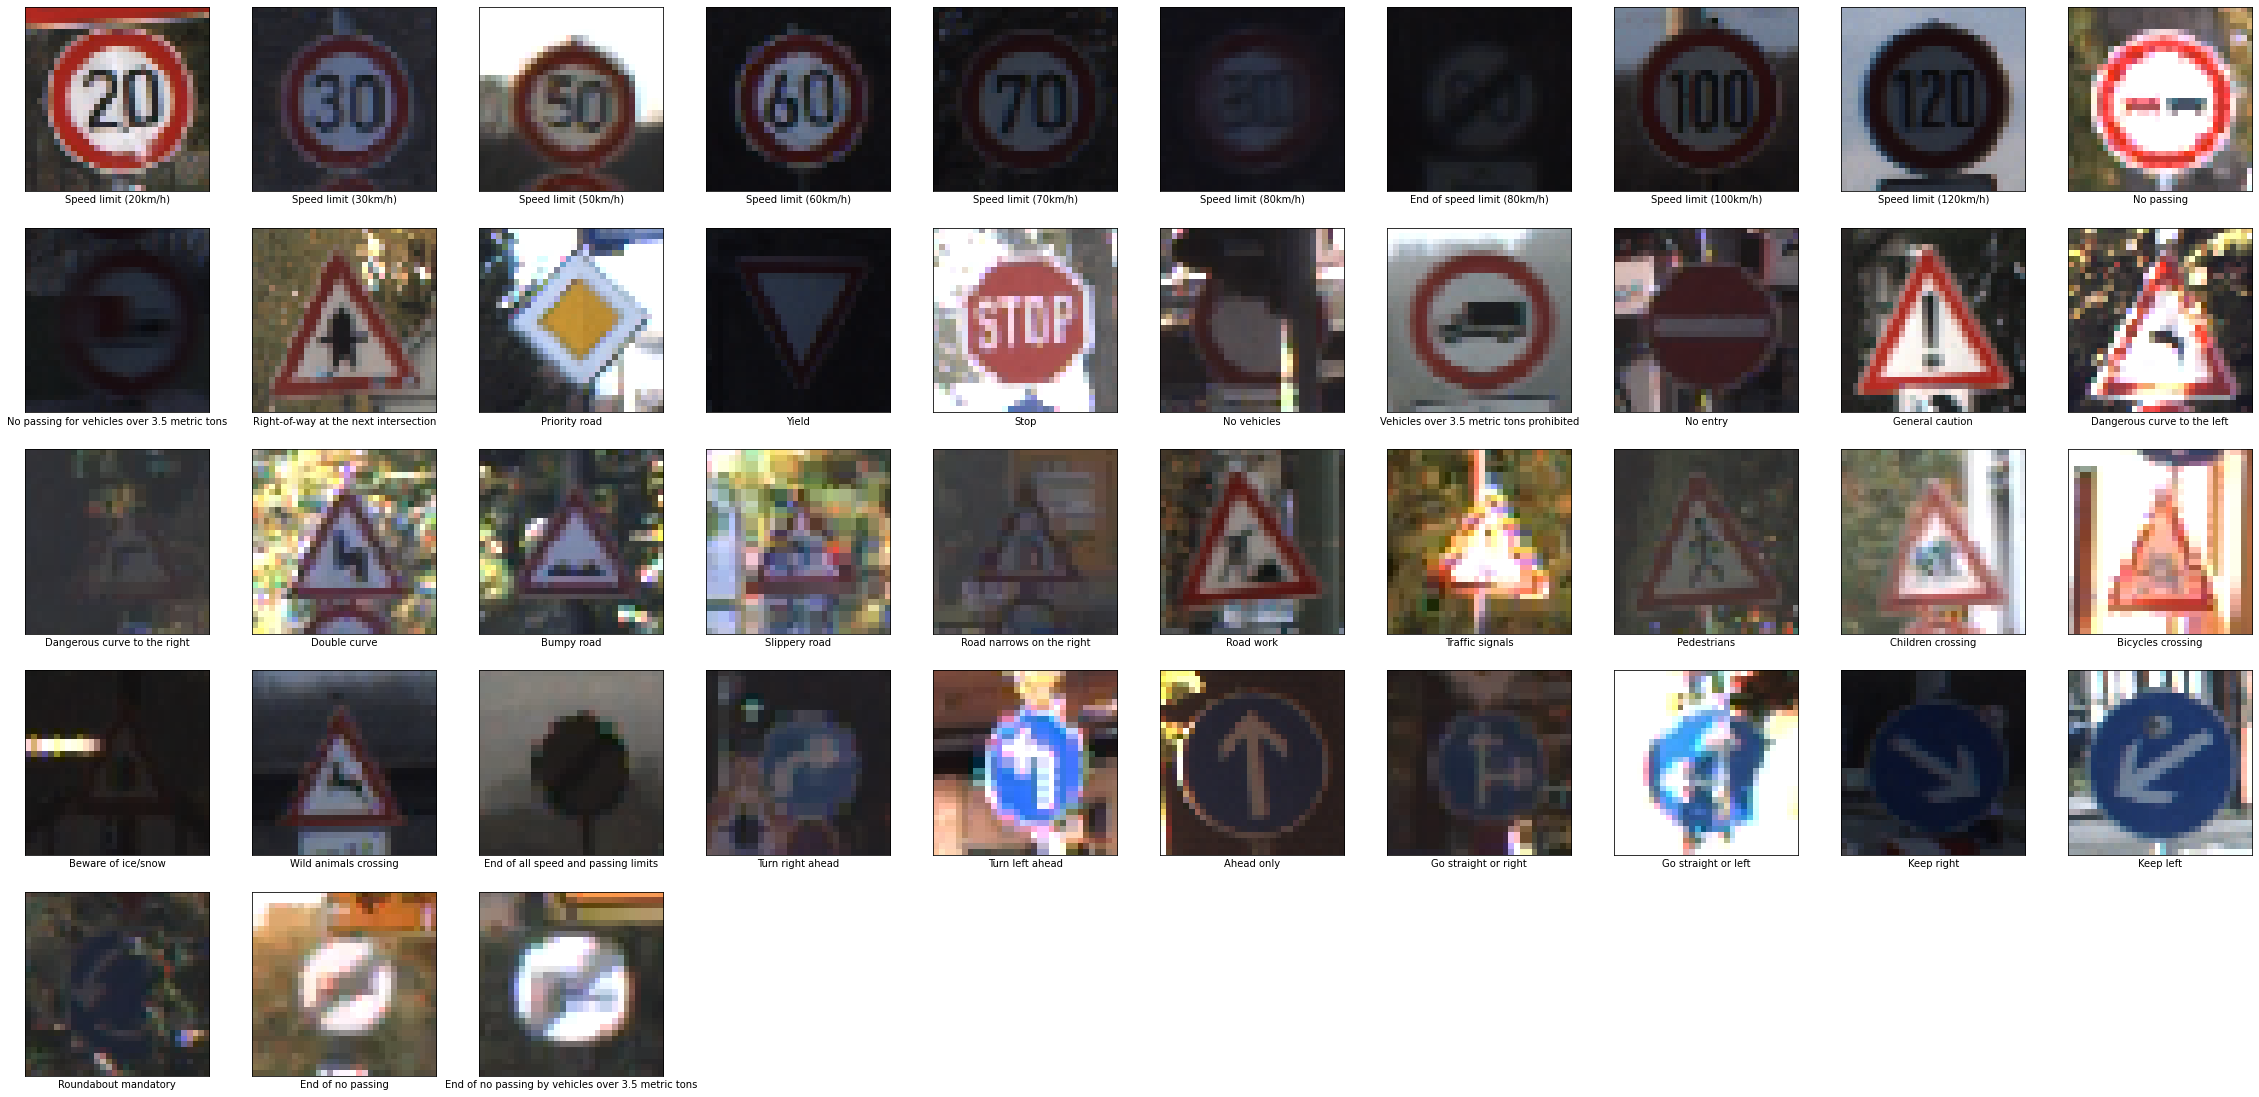

In [ ]:
%matplotlib inline
num_of_samples=[]
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(40,40))
index = 0
for i in range(43):
    plt.subplot(10, 10, i+1)
    x_selected = df_train[df_train['ClassId'] == i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classNames[i])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(32, 32))
    num_of_samples.append(len(x_selected))
    plt.imshow(img)
plt.show()

### 5. Chuẩn hóa dữ liệu

In [ ]:
X_train = X_train.astype("float") / 255.0
X_test = X_test.astype("float") / 255.0
X_val = X_val.astype("float") / 255.0

In [ ]:
X_train[0]

array([[[0.21960784, 0.21960784, 0.23529412],
        [0.21176471, 0.22352941, 0.22745098],
        [0.23137255, 0.22352941, 0.22745098],
        ...,
        [0.17254902, 0.1372549 , 0.14117647],
        [0.57254902, 0.58823529, 0.60784314],
        [0.15686275, 0.17647059, 0.25882353]],

       [[0.14509804, 0.14509804, 0.15294118],
        [0.14509804, 0.14117647, 0.14509804],
        [0.14117647, 0.1372549 , 0.14509804],
        ...,
        [0.15294118, 0.14509804, 0.14509804],
        [0.52941176, 0.57254902, 0.55686275],
        [0.15686275, 0.16862745, 0.23137255]],

       [[0.18431373, 0.16862745, 0.16862745],
        [0.21568627, 0.19607843, 0.20392157],
        [0.15294118, 0.16078431, 0.16862745],
        ...,
        [0.6745098 , 0.50196078, 0.45882353],
        [0.47058824, 0.56862745, 0.56862745],
        [0.15294118, 0.16862745, 0.23921569]],

       ...,

       [[0.37647059, 0.32941176, 0.31372549],
        [0.28235294, 0.24705882, 0.23921569],
        [0.34901961, 0

In [ ]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_val = lb.fit_transform(Y_val)
Y_test = lb.fit_transform(Y_test)

In [ ]:
Y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train, Y_train = shuffle(X_train, Y_train)

In [ ]:
X_val, Y_val = shuffle(X_val, Y_val)

### 6. Creating CNN Model - Xây dựng Mô Hình CNN

In [ ]:
model = Sequential()
learning_rate = 1e-2
batch_size = 54
num_epochs = 30
width = 32
height = 32
classes = 43
shape = (width,height, 3)

In [ ]:
model.add(Conv2D(32, (3 , 3), padding='same', input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(classes))

In [ ]:
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_12 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                     

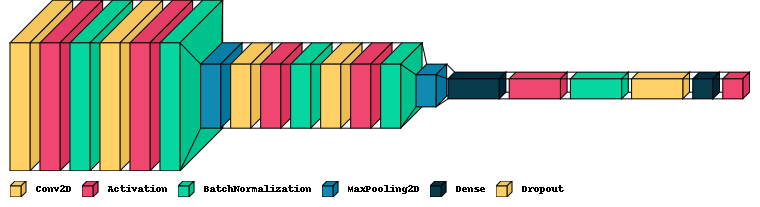

In [ ]:
visualkeras.layered_view(model, type_ignore = [layers.Flatten], legend = True)

###7. Tăng cường data 

In [ ]:
aug = ImageDataGenerator(rotation_range=18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")

### 8. Bluding The Model

In [ ]:
opt = SGD(lr=learning_rate, momentum=0.9, decay=learning_rate / num_epochs)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### 9. Train The Model - Huấn Luyện Mô Hình

In [ ]:
print("Start Training...")
H = model.fit_generator(aug.flow(X_train, Y_train, batch_size=batch_size), validation_data=(X_val, Y_val), steps_per_epoch=X_train.shape[0] 
                        // batch_size, epochs=num_epochs, verbose=1)

Start Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/30
580/580 [==============================] - 31s 51ms/step - loss: 3.1120 - accuracy: 0.2268 - val_loss: 1.5906 - val_accuracy: 0.4759
Epoch 2/30
580/580 [==============================] - 29s 51ms/step - loss: 1.8112 - accuracy: 0.4552 - val_loss: 0.9402 - val_accuracy: 0.6795
Epoch 3/30
580/580 [==============================] - 29s 50ms/step - loss: 1.1821 - accuracy: 0.6078 - val_loss: 0.6316 - val_accuracy: 0.7739
Epoch 4/30
580/580 [==============================] - 29s 51ms/step - loss: 0.8597 - accuracy: 0.7080 - val_loss: 0.5193 - val_accuracy: 0.8109
Epoch 5/30
580/580 [==============================] - 29s 51ms/step - loss: 0.6340 - accuracy: 0.7842 - val_loss: 0.3000 - val_accuracy: 0.8995
Epoch 6/30
580/580 [==============================] - 30s 52ms/step - loss: 0.5046 - accuracy: 0.8311 - val_loss: 0.2901 - val_accuracy: 0.8953
Epoch 7/30
580/580 [==============================] - 29s 51ms/step - loss: 0.4282 - accuracy: 0.8539 - val_loss: 0.2427 - val_accuracy:

### 10. Accuracy And Loss - Độ Chính Xác Và Mất Mát

In [ ]:
loss, accuracy = model.evaluate(X_val, Y_val)

print('Validation set accuracy: ', accuracy * 100)

246/246 [==============================] - 2s 7ms/step - loss: 0.0441 - accuracy: 0.9852
Validation set accuracy:  98.52078557014465


Text(0.5, 1.0, 'Loss')

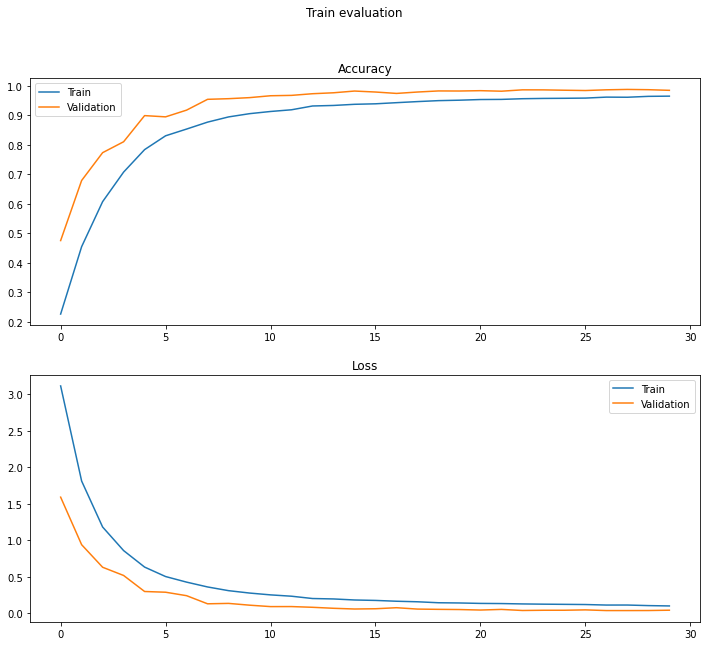

In [ ]:
accuracy = H.history['accuracy']
val_accuracy = H.history['val_accuracy']

loss = H.history['loss']
val_loss = H.history['val_loss']

fig, ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')

sns.lineplot(ax= ax[0],x=np.arange(0,len(accuracy)),y=accuracy)
sns.lineplot(ax= ax[0],x=np.arange(0,len(accuracy)),y=val_accuracy)

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(loss)),y=loss)
sns.lineplot(ax= ax[1],x=np.arange(0,len(loss)),y=val_loss)

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')

### 11.Lưu Mô Hình

In [ ]:
model.save('traffic_sign.ver2.h5')

### 12. Prediction - Dự Đoán 

In [ ]:
pred = model.predict(X_test) 

In [ ]:
Y_test = np.argmax(Y_test,axis=1)
pred = np.argmax(pred, axis=-1)

### 13. Evaluation The Model - Đánh Giá Mô Hình

In [ ]:
print('-Acuracy achieved: {:.2f}%\n-Accuracy by model was: {:.2f}%\n-Accuracy by validation was: {:.2f}%'.
      format(accuracy_score(Y_test,pred)*100,(H.history['accuracy'][-1])*100,(H.history['val_accuracy'][-1])*100))

-Acuracy achieved: 91.58%
-Accuracy by model was: 96.55%
-Accuracy by validation was: 98.52%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Test Data Accuracy: ', accuracy_score(Y_test,pred)*100)
print('Test Data Precision: ', precision_score(Y_test,pred, average= 'macro')*100)
print('Test Data Recall: ', recall_score(Y_test,pred, average='macro')*100)
print('Test Data F1-micro: ', f1_score(Y_test,pred, average='micro')*100)
print('Test Data F1-macro: ', f1_score(Y_test,pred, average='macro')*100)

Test Data Accuracy:  91.58353127474268
Test Data Precision:  85.56738583380876
Test Data Recall:  85.5019420389744
Test Data F1-micro:  91.58353127474268
Test Data F1-macro:  84.7532617362821


In [ ]:
cr = classification_report(df_test['ClassId'], pred)
cm = tf.math.confusion_matrix(df_test['ClassId'], pred )

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        60
           1       0.93      0.96      0.95       720
           2       0.93      0.96      0.94       750
           3       0.99      0.92      0.95       450
           4       0.97      0.94      0.96       660
           5       0.96      0.92      0.94       630
           6       0.95      0.91      0.93       150
           7       1.00      0.94      0.97       450
           8       0.86      1.00      0.92       450
           9       0.99      0.95      0.97       480
          10       1.00      0.99      1.00       660
          11       0.97      0.93      0.95       420
          12       0.98      0.91      0.94       690
          13       0.95      1.00      0.97       720
          14       1.00      1.00      1.00       270
          15       1.00      0.96      0.98       210
          16       0.98      1.00      0.99       150
          17       1.00    

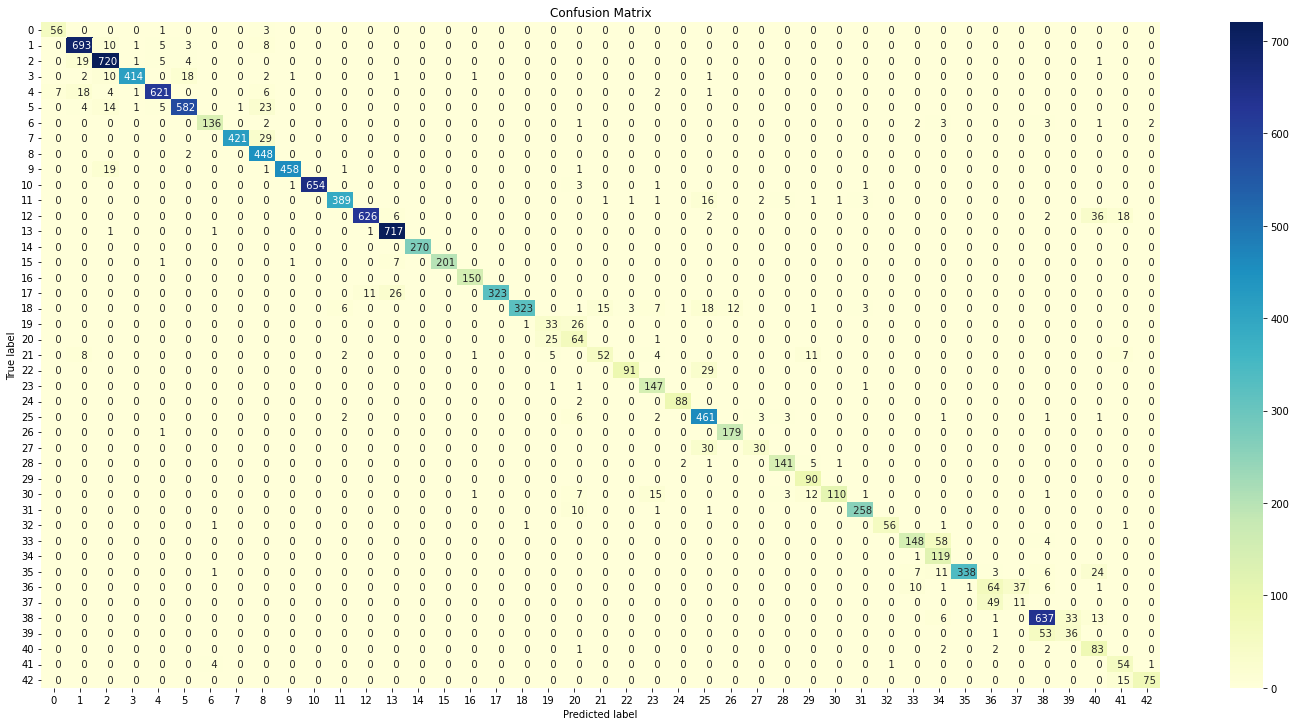

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='4g')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

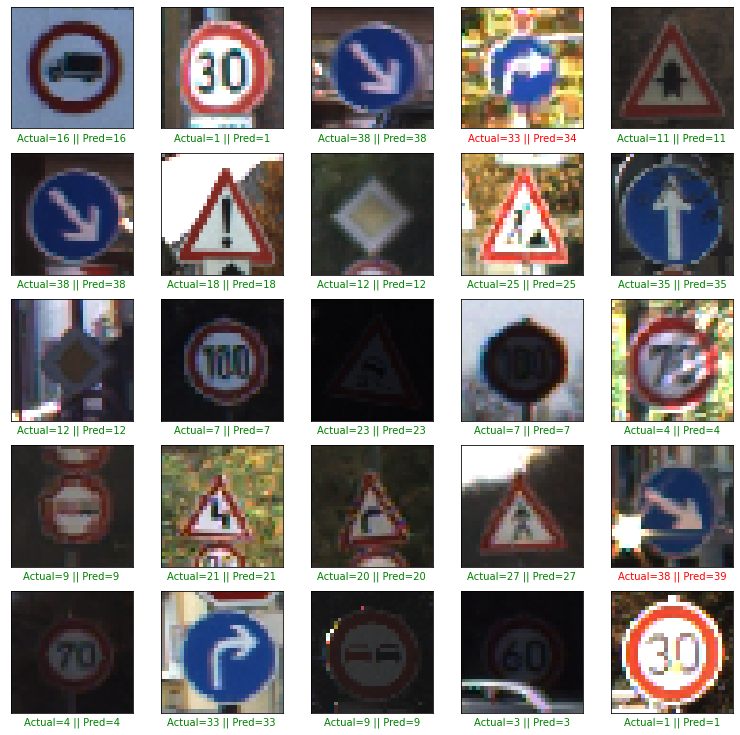

In [ ]:
plt.figure(figsize = (13, 13))
test_labels = df_test['ClassId']
start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()